In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#importing this to use files in drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#required packages
import numpy as np
import cv2 
import os
import random
import matplotlib.pyplot as plt
import pickle

In [ ]:
#declaring mu path and the categories
DIRECTORY= r'/content/drive/My Drive/Colab Notebooks/IMAGE_CLASSIFICATION/train' #mention the directory where your training files are
CATEGORIES =['cat', 'dog']

In [ ]:
IMG_SIZE=120 #sixe of the image

data=[]

#loop categorize the images

for category in CATEGORIES:
        folder=os.path.join(DIRECTORY,category)
        label = CATEGORIES.index(category)
        for img in os.listdir(folder):
            img_path= os.path.join(folder,img)
            img_arr= cv2.imread(img_path)
            img_arr=cv2.resize(img_arr, (IMG_SIZE,IMG_SIZE))
            data.append([img_arr,label])

In [ ]:
random.shuffle(data) #the data will be organised 

In [ ]:
#separating the data into x and y
x=[]
y=[]


for features, labels in data:
        x.append(features)
        y.append(labels)

In [ ]:
#converting it into the array
x= np.array(x)
y= np.array(y)

In [ ]:
pickle.dump(x, open('x.pkl','wb'))
pickle.dump(y, open('y.pkl','wb'))

In [ ]:
#x contains the values of pixels from 0 to 255, for easy calucation dividing it by 255 so the values will be 0 to 1
x=x/255

In [ ]:
x.shape

(926, 120, 120, 3)

In [ ]:
#importing required libraries for building our model
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense

In [ ]:
#building the model
model = Sequential()

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,input_shape=x.shape[1:], activation='relu'))

model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
results=model.fit(x,y, epochs=5, validation_split=0.1)

Epoch 1/5
27/27 [==============================] - 22s 800ms/step - loss: 0.2452 - accuracy: 0.8980 - val_loss: 0.9557 - val_accuracy: 0.6022
Epoch 2/5
27/27 [==============================] - 22s 796ms/step - loss: 0.3172 - accuracy: 0.8679 - val_loss: 0.8038 - val_accuracy: 0.6237
Epoch 3/5
27/27 [==============================] - 21s 795ms/step - loss: 0.1798 - accuracy: 0.9292 - val_loss: 1.1627 - val_accuracy: 0.6129
Epoch 4/5
27/27 [==============================] - 21s 796ms/step - loss: 0.1088 - accuracy: 0.9700 - val_loss: 1.3606 - val_accuracy: 0.6237
Epoch 5/5
27/27 [==============================] - 22s 800ms/step - loss: 0.0568 - accuracy: 0.9880 - val_loss: 1.3868 - val_accuracy: 0.6129


In [ ]:
model.save('cat.h5')

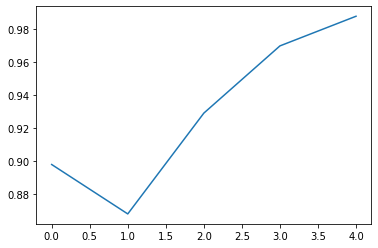

In [ ]:
#ploting the accurary
plt.plot(results.history['accuracy'])